# Projeto Prático 2 - Redes Neurais - 2020
## O neurônio de Rosenblatt

<img src="https://www.researchgate.net/profile/Germano_Rosa/publication/262747683/figure/fig1/AS:392393250623493@1470565249417/Figura-1-Modelo-de-um-neuronio-perceptron-de-Rosenblatt-Fonte-Adaptado-de-Medeiros.png" width=600px height=200px />

### Elaborado por: 

* Carlos Diego Ferreira
* João Victor de Oliveira
* Luiz Carlos Silva
* Mikael Fonseca

# Descrição Geral do projeto

Está dividido em 3 grandes partes, sendo elas
1. Implementação e treino de um neurônio apenas
2. Testes com diferentes configurações de hiper parâmetros
3. Treino em holdout + medição de desempenho

Este notebook é referente à parte 2

# Sumário:

**0. [Seção 0: Introdução](#id0)** <br>
**1. [Seção 1: Pré-experimento](#id1)** <br>
**2. [Seção 2: Carregar Dataset](#id2)** <br>
**3. [Seção 3: Experimento](#id3)** <br>
**4. [Seção 4: Resultados](#id4)** <br>

<a id="id0"></a> <br> 
## **Parte II: Experimentação:** 
Aproveitar o algoritmo construído na Parte I e executar 100 repetições do mesmo para as seguintes configurações: η x I = {0.4, 0.1, 0.01} x {(-100, 100),(-5, 5),(-0.5, 0.5)} em que I é o intervalo a ser utilizado para a distribuição uniforme do valor dos pesos. Assim, há 9 configurações a serem testadas, cada uma delas com 100 iterações.

In [52]:
import numpy as np
import pandas as pd
from perceptron import Perceptron
from dataset_loader import loadDataset
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

## Pré-Experimento
<a id="id1"></a> <br> 
### Implementação de funções auxiliares

In [53]:
# Retorna a média dos valores contindos em `array`
def mean(array):
    return sum(array)/len(array)


# Retorna o desvio padrão dos valores contindos em `array`
def stddev(array):
    _mean = mean(array)
    summation = 0
    
    for num in array:
        summation += (num - _mean)**2
        
    return (summation/len(array))**0.5

In [54]:
# Desenha o gráfico para cada solução encontrada
def plot_solution(X, Y, weights, l, s):
    X1 = X[:,0]
    X2 = X[:,1]
    
    get_line_y = lambda x, c0, c1: c0 + c1 * x

    c0 = weights[0]/weights[2]
    c1 = -weights[1]/weights[2]

    lineX = np.array([X1.min(), X1.max()])
    lineY = np.array([get_line_y(X1.min(), c0, c1), get_line_y(X1.max(), c0, c1)])

    binary_cmap = ListedColormap(['red', 'blue'])

    fig, ax = plt.subplots(figsize=(8,8))
    ax.set(xlabel='Característica 1 (x1)', ylabel='Característica 2 (x2)',
           title='Dados de entrada e solução para η = %s e I = (-%s, +%s)' %(str(l), str(s), str(s)))

    scatter = ax.scatter(X1, X2, c=Y, marker=".", cmap=binary_cmap, linewidth=0)
    ax.plot(lineX, lineY, color="black", alpha= 0.5)

    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Saída", bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))

In [55]:
# Realiza a tarefa de experimento
# X: conjunto de treinamento
# Y: repostas supervisonadas
# fit_info: armazena as informações de cara experimento
# learn: taxa de aprendizado para o experimento
# samp: amostra para gerar distribuição uniforme
def fit_and_get_data(X, Y, fit_info, learn, samp):
    p = Perceptron()
    p.fit(X, Y, num_epochs = 100, learning_rate = learn, sampling_range = samp)
    
    fit_info['η'].append(learn)
    fit_info['I'].append(samp)
    fit_info['Média'].append(mean(p.epoch_changes))
    fit_info['Desvio padrão'].append(stddev(p.epoch_changes))
    fit_info['Épocas'].append(len(p.epoch_changes))
    
    return fit_info, p.weights
    

<a id="id2"></a> <br> 
### Carregar Dataset

In [56]:
X, Y = loadDataset('../data/data0.txt');

# fit_info: armazena as informações de cada experimento
fit_info = {
    "η": [],
    "I": [],
    "Média": [],
    "Desvio padrão": [],
    "Épocas": []
}

#      x1          x2      y

[[-0.00149369 -0.03581784  0.        ]
 [ 0.01234945  0.10249524  0.        ]
 [ 0.13954598  0.05607083  0.        ]
 [-0.08246548  0.1573242   0.        ]
 [-0.02920357 -0.08314259  0.        ]]


<a id="id3"></a> <br> 
## Experimento
##### Cada uma das 9 combinações possíveis do experimento são apresentadas nas células abaixo

### Exp n. 0: Para η = 0,4 e I = (-100, +100)

In [57]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.4, 100)

Pesos iniciais: [ 28.07647666 -23.20169274  17.58325684]
------ Época 1 ------
Novos pesos: [ 27.67647666 -23.26411019  17.9144876 ]
Novos pesos: [ 27.27647666 -23.23718668  18.36591706]
Novos pesos: [ 26.87647666 -23.2600267   18.74848345]
Novos pesos: [ 26.47647666 -23.33027614  19.11579046]
Novos pesos: [ 26.07647666 -23.27301619  19.4621365 ]
Novos pesos: [ 25.67647666 -23.25854191  19.9114347 ]
Novos pesos: [ 25.27647666 -23.2231771   20.31158672]
Novos pesos: [ 24.87647666 -23.19424037  20.69801741]
Novos pesos: [ 24.47647666 -23.22799575  21.10806695]
Novos pesos: [ 24.07647666 -23.18132335  21.49703709]
Novos pesos: [ 23.67647666 -23.14116007  21.91341283]
Novos pesos: [ 23.27647666 -23.11861655  22.25659785]
Novos pesos: [ 22.87647666 -23.10544195  22.62896036]
Novos pesos: [ 22.47647666 -23.01807234  23.02714315]
Novos pesos: [ 22.07647666 -23.00432055  23.37865724]
Novos pesos: [ 21.67647666 -22.94982405  23.77795882]
Novos pesos: [ 21.27647666 -22.88396413  24.11210778]
Nov

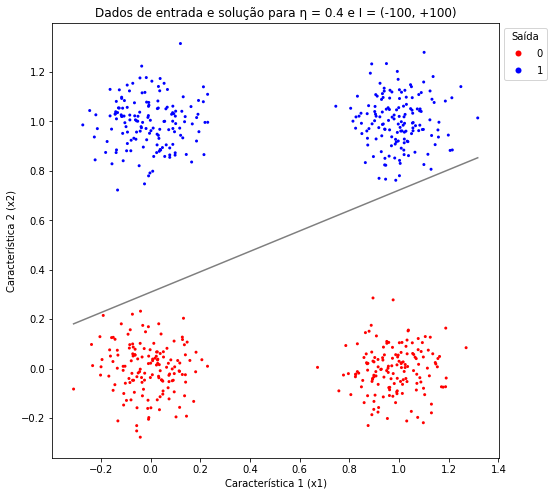

In [58]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

### Exp n. 1: Para η = 0,4 e I = (-1, +1)

In [59]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.4, 1)

Pesos iniciais: [-0.32076905 -0.41606629 -0.39572674]
------ Época 1 ------
Novos pesos: [ 0.07923095 -0.41546882 -0.3813996 ]
Novos pesos: [ 0.47923095 -0.33542147 -0.3844316 ]
Novos pesos: [ 0.07923095 -0.39783891 -0.05320084]
Novos pesos: [-0.32076905 -0.3709154   0.39822862]
Novos pesos: [ 0.07923095 -0.68928109  0.40622404]
Novos pesos: [-0.32076905 -0.31320001  0.85503901]
Total de ajustes: 6
------ Época 2 ------
Novos pesos: [ 0.07923095 -0.31260253  0.86936615]
Novos pesos: [ 0.47923095 -0.31754231  0.82836805]
Novos pesos: [0.07923095 0.14507761 1.21436572]
Total de ajustes: 3
------ Época 3 ------
Novos pesos: [0.47923095 0.14013783 1.17336762]
Total de ajustes: 1
------ Época 4 ------
Total de ajustes: 0
------ Época 5 ------
Total de ajustes: 0
------ Época 6 ------
Total de ajustes: 0
------ Época 7 ------
Total de ajustes: 0
------ Época 8 ------
Total de ajustes: 0
------ Época 9 ------
Total de ajustes: 0
------ Época 10 ------
Total de ajustes: 0
------ Época 11 -----

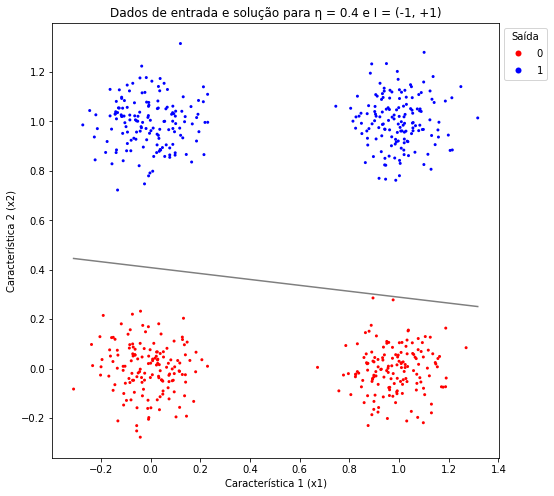

In [60]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

### Exp n. 2: Para η = 0,4 e I = (-0.5, +0.5)

In [61]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.4, 0.5)

Pesos iniciais: [-0.18649209  0.09020226  0.2194181 ]
------ Época 1 ------
Novos pesos: [0.21350791 0.09079974 0.23374523]
Novos pesos: [-0.18649209  0.02838229  0.56497599]
Novos pesos: [ 0.21350791 -0.28998339  0.57297141]
Novos pesos: [-0.18649209  0.08832188  0.87938444]
Total de ajustes: 4
------ Época 2 ------
Novos pesos: [0.21350791 0.08891936 0.89371157]
Novos pesos: [ 0.61350791 -0.26281842  0.83312255]
Novos pesos: [0.21350791 0.1998015  1.21912022]
Total de ajustes: 3
------ Época 3 ------
Novos pesos: [0.61350791 0.18691962 1.14653867]
Total de ajustes: 1
------ Época 4 ------
Total de ajustes: 0
------ Época 5 ------
Total de ajustes: 0
------ Época 6 ------
Total de ajustes: 0
------ Época 7 ------
Total de ajustes: 0
------ Época 8 ------
Total de ajustes: 0
------ Época 9 ------
Total de ajustes: 0
------ Época 10 ------
Total de ajustes: 0
------ Época 11 ------
Total de ajustes: 0
------ Época 12 ------
Total de ajustes: 0
------ Época 13 ------
Total de ajustes: 0


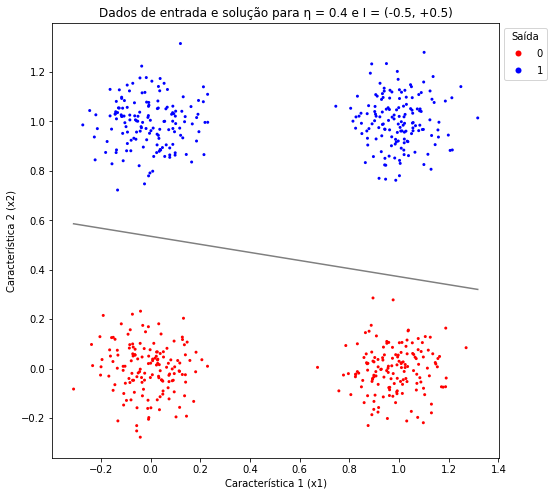

In [62]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

### Exp n. 3: Para η = 0,1 e I = (-100, +100)

In [63]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.1, 100)

Pesos iniciais: [ 49.37237861  -9.6213069  -30.16723093]
------ Época 1 ------
Novos pesos: [ 49.27237861  -9.63691126 -30.08442324]
Novos pesos: [ 49.17237861  -9.63018039 -29.97156587]
Novos pesos: [ 49.07237861  -9.63589039 -29.87592427]
Novos pesos: [ 48.97237861  -9.65345275 -29.78409752]
Novos pesos: [ 48.87237861  -9.63913776 -29.69751101]
Novos pesos: [ 48.77237861  -9.63551919 -29.58518646]
Novos pesos: [ 48.67237861  -9.62667799 -29.48514846]
Novos pesos: [ 48.57237861  -9.61944381 -29.38854078]
Novos pesos: [ 48.47237861  -9.62788265 -29.2860284 ]
Novos pesos: [ 48.37237861  -9.61621455 -29.18878586]
Novos pesos: [ 48.27237861  -9.60617373 -29.08469193]
Novos pesos: [ 48.17237861  -9.60053785 -28.99889567]
Novos pesos: [ 48.07237861  -9.5972442  -28.90580504]
Novos pesos: [ 47.97237861  -9.5754018  -28.80625935]
Novos pesos: [ 47.87237861  -9.57973652 -28.68873728]
Novos pesos: [ 47.77237861  -9.58618184 -28.58653462]
Novos pesos: [ 47.67237861  -9.58274389 -28.4986561 ]
Nov

Total de ajustes: 0
------ Época 57 ------
Total de ajustes: 0
------ Época 58 ------
Total de ajustes: 0
------ Época 59 ------
Total de ajustes: 0
------ Época 60 ------
Total de ajustes: 0
------ Época 61 ------
Total de ajustes: 0
------ Época 62 ------
Total de ajustes: 0
------ Época 63 ------
Total de ajustes: 0
------ Época 64 ------
Total de ajustes: 0
------ Época 65 ------
Total de ajustes: 0
------ Época 66 ------
Total de ajustes: 0
------ Época 67 ------
Total de ajustes: 0
------ Época 68 ------
Total de ajustes: 0
------ Época 69 ------
Total de ajustes: 0
------ Época 70 ------
Total de ajustes: 0
------ Época 71 ------
Total de ajustes: 0
------ Época 72 ------
Total de ajustes: 0
------ Época 73 ------
Total de ajustes: 0
------ Época 74 ------
Total de ajustes: 0
------ Época 75 ------
Total de ajustes: 0
------ Época 76 ------
Total de ajustes: 0
------ Época 77 ------
Total de ajustes: 0
------ Época 78 ------
Total de ajustes: 0
------ Época 79 ------
Total de aj

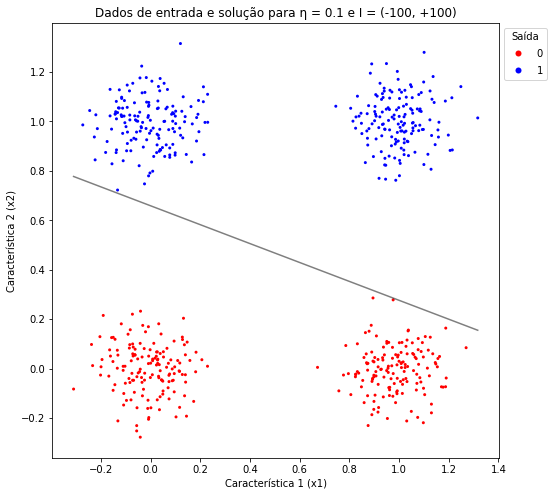

In [64]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

### Exp n. 4: Para η = 0,1 e I = (-1, +1)

In [65]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.1, 1)

Pesos iniciais: [-0.31983857 -0.11511115 -0.3088102 ]
------ Época 1 ------
Novos pesos: [-0.21983857 -0.11496178 -0.30522842]
Novos pesos: [-0.11983857 -0.11619672 -0.31547794]
Novos pesos: [-0.01983857 -0.13015132 -0.32108503]
Novos pesos: [ 0.08016143 -0.12723097 -0.31277077]
Novos pesos: [ 0.18016143 -0.12157208 -0.28761138]
Novos pesos: [ 0.08016143 -0.13717644 -0.20480369]
Novos pesos: [-0.01983857 -0.13044557 -0.09194633]
Novos pesos: [-0.11983857 -0.13615557  0.00369527]
Novos pesos: [-0.01983857 -0.21574699  0.00569413]
Novos pesos: [-0.11983857 -0.12172672  0.11789787]
Total de ajustes: 10
------ Época 2 ------
Novos pesos: [-0.01983857 -0.12157735  0.12147965]
Novos pesos: [ 0.08016143 -0.1228123   0.11123013]
Novos pesos: [-0.01983857 -0.10849731  0.19781664]
Total de ajustes: 3
------ Época 3 ------
Novos pesos: [ 0.08016143 -0.10834794  0.20139842]
Novos pesos: [-0.01983857  0.00730704  0.29789784]
Total de ajustes: 2
------ Época 4 ------
Novos pesos: [0.08016143 0.00745

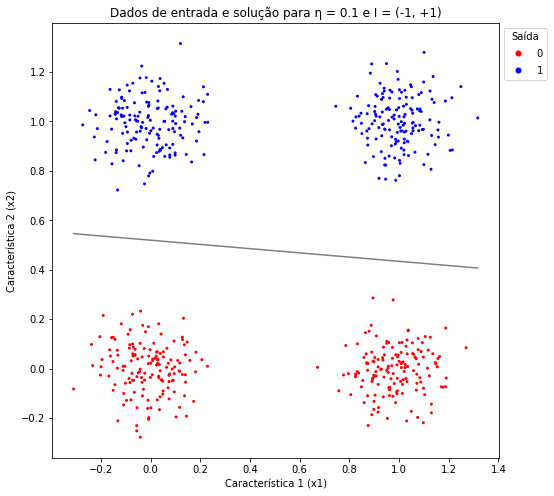

In [66]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

### Exp n. 5: Para η = 0,1 e I = (-0.5, +0.5)

In [67]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.1, 0.5)

Pesos iniciais: [-0.17328477  0.18011947  0.19720247]
------ Época 1 ------
Novos pesos: [-0.07328477  0.18026884  0.20078425]
Novos pesos: [0.02671523 0.17903389 0.19053473]
Novos pesos: [0.12671523 0.16507929 0.18492765]
Novos pesos: [0.02671523 0.14268808 0.26933442]
Novos pesos: [0.12671523 0.06309666 0.27133328]
Novos pesos: [ 0.22671523 -0.03451828  0.24352591]
Novos pesos: [0.12671523 0.0811367  0.34002533]
Total de ajustes: 7
------ Época 2 ------
Novos pesos: [ 0.22671523 -0.03766341  0.32361908]
Novos pesos: [0.12671523 0.05691291 0.40022233]
Total de ajustes: 2
------ Época 3 ------
Novos pesos: [ 0.22671523 -0.0618872   0.38381609]
Total de ajustes: 1
------ Época 4 ------
Total de ajustes: 0
------ Época 5 ------
Total de ajustes: 0
------ Época 6 ------
Total de ajustes: 0
------ Época 7 ------
Total de ajustes: 0
------ Época 8 ------
Total de ajustes: 0
------ Época 9 ------
Total de ajustes: 0
------ Época 10 ------
Total de ajustes: 0
------ Época 11 ------
Total de a

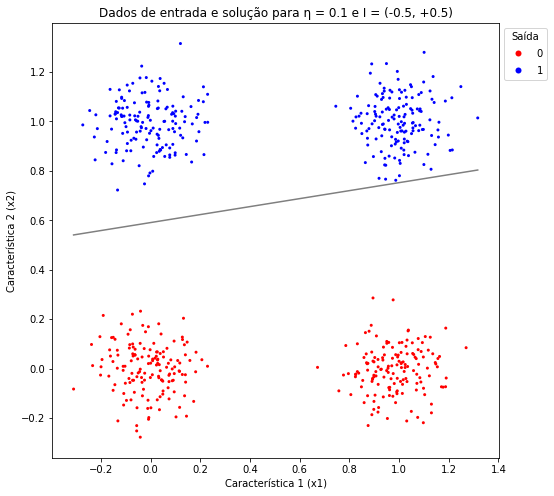

In [68]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

### Exp n. 6: Para η = 0,01 e I = (-100, +100)

In [69]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.01, 100)

Pesos iniciais: [26.42248846 -7.40188651 27.14379932]
------ Época 1 ------
Novos pesos: [26.41248846 -7.40344695 27.15208009]
Novos pesos: [26.40248846 -7.40401795 27.16164425]
Novos pesos: [26.39248846 -7.40577419 27.17082692]
Novos pesos: [26.38248846 -7.40434269 27.17948557]
Novos pesos: [26.37248846 -7.40361927 27.18914634]
Novos pesos: [26.36248846 -7.40245246 27.19887059]
Novos pesos: [26.35248846 -7.40188887 27.20745022]
Novos pesos: [26.34248846 -7.40155951 27.21675928]
Novos pesos: [26.33248846 -7.39937526 27.22671385]
Novos pesos: [26.32248846 -7.39903147 27.2355017 ]
Novos pesos: [26.31248846 -7.40014082 27.24390606]
Novos pesos: [26.30248846 -7.40111221 27.2527132 ]
Novos pesos: [26.29248846 -7.39974979 27.26269574]
Novos pesos: [26.28248846 -7.3981033  27.27104946]
Novos pesos: [26.27248846 -7.39813503 27.27896014]
Novos pesos: [26.26248846 -7.39717742 27.28853731]
Novos pesos: [26.25248846 -7.39785761 27.29785295]
Novos pesos: [26.24248846 -7.39709267 27.30677482]
Novos 

Novos pesos: [21.27248846 -2.96920236 31.6881051 ]
Total de ajustes: 1
------ Época 34 ------
Novos pesos: [21.26248846 -2.95933558 31.69572156]
Total de ajustes: 1
------ Época 35 ------
Novos pesos: [21.25248846 -2.94946881 31.70333801]
Total de ajustes: 1
------ Época 36 ------
Novos pesos: [21.24248846 -2.93960203 31.71095447]
Total de ajustes: 1
------ Época 37 ------
Total de ajustes: 0
------ Época 38 ------
Total de ajustes: 0
------ Época 39 ------
Total de ajustes: 0
------ Época 40 ------
Total de ajustes: 0
------ Época 41 ------
Total de ajustes: 0
------ Época 42 ------
Total de ajustes: 0
------ Época 43 ------
Total de ajustes: 0
------ Época 44 ------
Total de ajustes: 0
------ Época 45 ------
Total de ajustes: 0
------ Época 46 ------
Total de ajustes: 0
------ Época 47 ------
Total de ajustes: 0
------ Época 48 ------
Total de ajustes: 0
------ Época 49 ------
Total de ajustes: 0
------ Época 50 ------
Total de ajustes: 0
------ Época 51 ------
Total de ajustes: 0
--

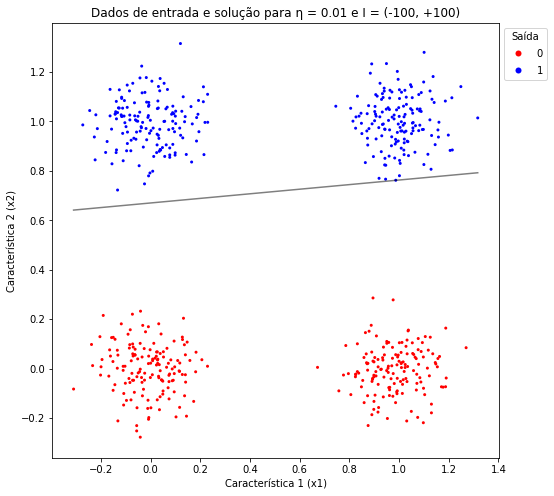

In [70]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

### Exp n. 7: Para η = 0,01 e I = (-1, +1)

In [71]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.01, 1)

Pesos iniciais: [-0.32195633  0.11321332  0.02791909]
------ Época 1 ------
Novos pesos: [-0.31195633  0.11322826  0.02827727]
Novos pesos: [-0.30195633  0.11310476  0.02725232]
Novos pesos: [-0.29195633  0.1117093   0.02669161]
Novos pesos: [-0.28195633  0.11253396  0.02511837]
Novos pesos: [-0.27195633  0.11282599  0.0259498 ]
Novos pesos: [-0.26195633  0.11370278  0.02634597]
Novos pesos: [-0.25195633  0.11454781  0.02537483]
Novos pesos: [-0.24195633  0.11464085  0.02516855]
Novos pesos: [-0.23195633  0.11664203  0.02509275]
Novos pesos: [-0.22195633  0.11701251  0.02545006]
Novos pesos: [-0.21195633  0.11627447  0.02667177]
Novos pesos: [-0.20195633  0.11682689  0.02825175]
Novos pesos: [-0.19195633  0.11745575  0.02746483]
Novos pesos: [-0.18195633  0.11719045  0.02678449]
Novos pesos: [-0.17195633  0.11754137  0.02733675]
Novos pesos: [-0.16195633  0.11823206  0.02780563]
Novos pesos: [-0.15195633  0.11895592  0.02720554]
Novos pesos: [-0.14195633  0.12027768  0.02665627]
Novos 

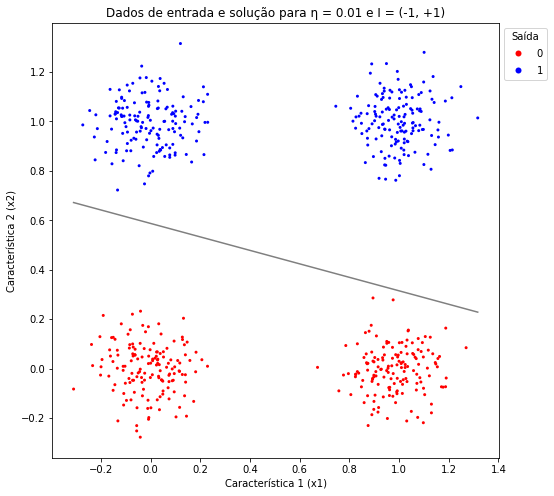

In [72]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

### Exp n. 8: Para η = 0,01 e I = (-0.5, +0.5)

In [73]:
fit_info, weights = fit_and_get_data(X, Y, fit_info, 0.01, 0.5)

Pesos iniciais: [-0.19552642  0.24422766  0.06349097]
------ Época 1 ------
Novos pesos: [-0.18552642  0.2442426   0.06384915]
Novos pesos: [-0.17552642  0.24411911  0.06282419]
Novos pesos: [-0.16552642  0.24272365  0.06226349]
Novos pesos: [-0.15552642  0.2435483   0.06069024]
Novos pesos: [-0.14552642  0.24384034  0.06152167]
Novos pesos: [-0.13552642  0.24471712  0.06191784]
Novos pesos: [-0.12552642  0.24556215  0.06094671]
Novos pesos: [-0.11552642  0.24565519  0.06074042]
Novos pesos: [-0.10552642  0.24765638  0.06066462]
Novos pesos: [-0.09552642  0.24802685  0.06102193]
Novos pesos: [-0.08552642  0.24728881  0.06224364]
Novos pesos: [-0.07552642  0.24784123  0.06382362]
Novos pesos: [-0.06552642  0.2484701   0.0630367 ]
Novos pesos: [-0.05552642  0.24820479  0.06235637]
Novos pesos: [-0.04552642  0.24855572  0.06290862]
Novos pesos: [-0.03552642  0.2492464   0.0633775 ]
Novos pesos: [-0.02552642  0.24997027  0.06277742]
Novos pesos: [-0.01552642  0.25115569  0.06096495]
Novos 

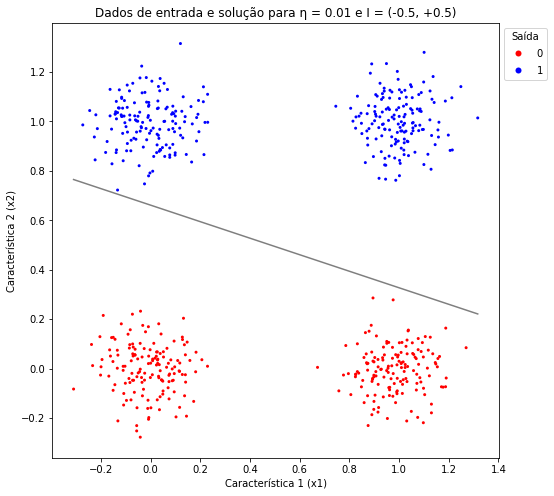

In [74]:
plot_solution(X, Y, weights, fit_info['η'][-1], fit_info['I'][-1])

<a id="id4"></a> <br> 
## Resultados
#### A média e desvio padrão da quantidade de ajustes e número de épocas até convergência são apresentadas na tabela abaixo

In [75]:
pd.DataFrame.from_dict(fit_info)

,η,I,Média,Desvio padrão,Épocas
0,0.40,100.0,22.000000,21.000000,2
1,0.40,1.0,3.333333,2.054805,3
2,0.40,0.5,2.666667,1.247219,3
3,0.10,100.0,33.000000,82.073138,13
4,0.10,1.0,3.800000,3.187475,5
5,0.10,0.5,3.333333,2.624669,3
6,0.01,100.0,14.388889,33.205821,36
7,0.01,1.0,17.000000,19.866219,3
8,0.01,0.5,18.000000,17.146428,3


### Discusão dos resultados
###### Definições para η
1. η alto (0.40): converge rapidamente, porém é instável, ou seja, pode encontrar um mínimo rapidamente ou nunca encontrar;
2. η mediano (0.10): características média entre alto e baixo;
3. η baixo (0.01): converge lentamente e é mais confiável, porém isso não garante encontrar um mínimo global sempre.

###### Definições para I
1. I extremamente largo (100.0): tem-se muitos valores distantes de 1.0, fato que o torna um potencial fator de instabilidade para uma entrada qualquer;
2. I mediano (1.0): tem-se valores mais próximos de 1.0, fato que o torna um ótimo sistema de pesos;
3. I estreito (0.5): tem-se valores razoavelmente próximos de 1.0, fato que o torna um bom sistema de pesos;

*As conclusões abaixo são feitas com base nas definições*

#### `Exp n. 0: `
Em apenas **1 época** precisou realizar **96 ajustes** para encontrar uma reta de separação. Para esse conjunto de dados pode ser considerado um **bom resultado**, porém essa configuração tem **não é confiável e tem grande instabilidade**.

---

#### `Exp n. 1:`
Em apenas **4 épocas** precisou realizar um total de **10 ajustes** para encontrar uma reta de separação. Para esse conjunto de dados pode ser considerado um **bom resultado** e essa configuração tem potencial para garantir o mesmo desempenho em um outro conjunto com dados, **porém sem garantia**.

---

#### `Exp n. 2:` 
Em apenas **4 épocas** precisou realizar um total de **7 ajustes** para encontrar uma reta de separação. Para esse conjunto de dados pode ser considerado um **bom resultado** e essa configuração tem potencial para garantir o mesmo desempenho em um outro conjunto com dados, **porém sem garantia**.

---

#### `Exp n. 3:` 
Em **9 épocas** precisou realizar **901 ajustes** para encontrar uma reta de separação. Para esse conjunto de dados pode ser considerado um **resultado ruim** e essa configuração tem potencial para ser **pior em demais conjutos** devido aos parâmetros η e I.

---

#### `Exp n. 4: `
Em apenas **3 épocas** precisou realizar um total de **9 ajustes** para encontrar uma reta de separação. Para esse conjunto de dados pode ser considerado um **excelente resultado** e essa configuração tem potencial para garantir o mesmo desempenho em um outro conjunto com dados **com confiança**.

---

#### `Exp n. 5:` 
Em apenas **2 épocas** precisou realizar um total de **4 ajustes** para encontrar uma reta de separação. Para esse conjunto de dados pode ser considerado um **ótimo resultado** e essa configuração tem potencial para garantir o mesmo desempenho em um outro conjunto com dados **com confiança**.

---

#### `Exp n. 6:`
Esse experimento carrega a pior combinação de parâmetros: a taxa de aprendizagem é muito baixa para o intervalo de pesos utilizados. A lentidão e instabilidade fez o neurônio utilizar todas as 100 épocas e ainda assim não conseguir encontrar em uma reta de separação aceitável. Para esse conjunto de dados, o resultado é considerado **péssimo**.

---

#### `Exp n. 7:`
Em **4 épocas** precisou realizar **125 ajustes** para encontrar uma reta de separação. Para esse conjunto de dados pode ser considerado um **resultado razoável**, porém essa configuração tem potencial para ser **pior em demais conjutos** devido aos parâmetros η e I.

---

#### `Exp n. 8: `
Em apenas **1 época** precisou realizar **4 ajustes** para encontrar uma reta de separação. Para esse conjunto de dados pode ser considerado um **ótimo resultado** e essa configuração tem potencial para garantir o mesmo desempenho em um outro conjunto com dados **com confiança**.

### Veredito
##### Os parâmetros η e I afetam diretamente a convergência do neurônio e os resultados acima mostram que existem sim combinações que geram melhores e piores neurônios. Em geral, podemos concluir que um fator de aprendizagem e o intervalo de distribuição de pesos devem ser compatíveis entre si e adequados ao conjunto de dados. Assim, podemos afimar que:
1. Os experimentos 4, 5 e 8 são os melhores;
2. Os experimentos 0, 3, 6 são os piores;
3. Os demais experimentos são aceitáveis.